In [1]:
# Standard Libraries


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.constants import h,k,c

In [2]:
# Plot settings


dark = True
if dark:
    sns.set_style('darkgrid')
    plt.rc("xtick", labelsize=16) # , top=True, direction="in"
    plt.rc("ytick", labelsize=16) # , right=True, direction="in"
else:
    plt.rc("xtick", labelsize=16, top=True, direction="in")
    plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("axes", labelsize=18)
plt.rc("axes", titlesize=20)
plt.rc("legend", fontsize=16)
plt.rc("figure", figsize=(7, 5), titlesize=18)

In [31]:
# Functions


def make_ax(data, x, y, xlabel = 'x', ylabel = 'y', title = 'Title', figsize = (10, 10), label = None):
    # Make fig and ax
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Plot data
    ax.plot(data[x], data[y], label = label, color = 'black')

    # Set title and axis labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Return fig and ax
    return fig, ax


def plot_ax(ax, legend = False, grid = False, save = False, filename = 'default.pdf'):
    if grid:
        ax.grid()
    if legend:
        ax.legend(facecolor='white', edgecolor='black', shadow=True)
    if save:
        plt.savefig(filename)
    plt.show()


def polygon(x1,y1,x2,y2,c):
    ax = plt.gca()
    polygon = plt.Polygon( [ (x1,y1), (x2,y2), (x2,0), (x1,0) ], color=c, alpha=0.2 )
    ax.add_patch(polygon)

    
def add_sprectrum(ax, X, Y, cmap=plt.get_cmap("jet")):
    N  = len(X)

    for n, (x, y) in enumerate(zip(X,Y)):
        color = cmap((x - 380)/(750 - 380))
        if n+1 == N: continue
        polygon(x,y,X[n+1],Y[n+1],color)
    
    return ax
        

def add_arrow(ax, x, y, up=True, name='Default', size=5, fontsize=12):
    if up:
        ax.arrow(x, y, dx=0, dy=size*15, head_width = size/8, head_length = size*10, 
                 width = size/15, facecolor='white', edgecolor='black')
        ax.text(x - size/10, y - size*20, name, fontsize=fontsize)
    else:
        ax.arrow(x, y, dx=0, dy=-size*15, head_width = size/8, head_length = size*10, 
                 width = size/15, facecolor='white', edgecolor='black')
        ax.text(x - size/10, y + size*10, name, fontsize=fontsize)
    return ax


def blackbody(x, T, A, a): # x = wavelength, T = temperature, A = fit amplitude constant
    x = x * 10**(-9) # nm --> m
    return A * (2*h*c**2)/((x - a)**5) * 1/(np.exp( (h*c)/((x - a)*k*T) ) - 1)


def wiens_forskydningslov(lambda_max, lambda_error):
    x = 4.96511
    T_sun = (h*c) / (x*k) * 1 / ( lambda_max * 10**(-9) )
    T_sun_error = abs( (h*c) / (x*k) * 1 / ( lambda_max * 10**(-9) )**2 * ( lambda_error * 10**(-9) ) )
    return T_sun, T_sun_error 

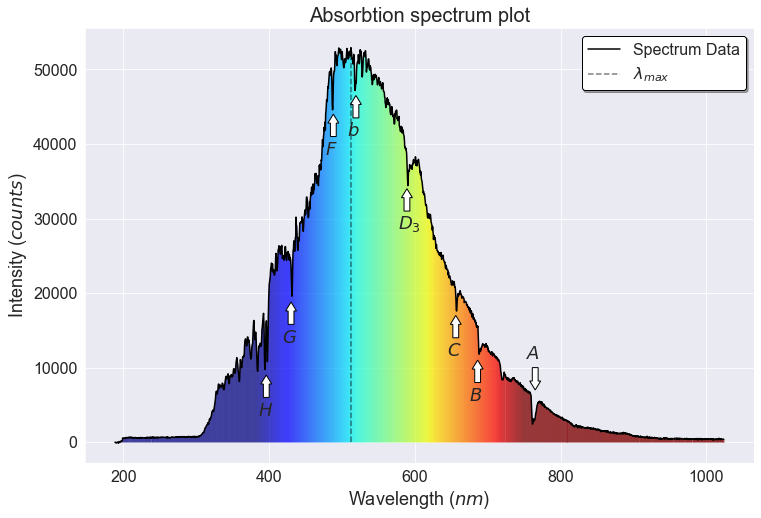

In [39]:
# Plot absorbtion sprectrum data


# Load in data
df = pd.read_csv('../Cleaned_Data/Absorbtion_data/absorbtion_spectrum_sunlight_data_cleaned.csv')


# Make ax and fig for plotting data
fig, ax = make_ax(df, x='Wavelength', y='Intensity', title='Absorbtion spectrum plot',
                 figsize=(12,8), xlabel='Wavelength ($nm$)', ylabel=r'Intensity ($counts$)',
                 label='Spectrum Data')


# Add spectrum
ax = add_sprectrum(ax, df['Wavelength'], df['Intensity'])


# Find wavelength at which max intensity occours and plot it
intensity_max = df['Intensity'].max()
lambda_max = df.loc[df['Intensity'] == intensity_max]['Wavelength']
ax.vlines(lambda_max, 0, intensity_max, ls='--', color='black', alpha=0.5, label=r'$\lambda_{max}$')


# Add arrow
ax = add_arrow(ax, 488, 41000, up=True, name=r'$F$', size=120, fontsize=18)
ax = add_arrow(ax, 589, 31000, up=True, name=r'$D_3$', size=120, fontsize=18)
ax = add_arrow(ax, 656, 14000, up=True, name=r'$C$', size=120, fontsize=18)
ax = add_arrow(ax, 430, 15800, up=True, name=r'$G$', size=120, fontsize=18)
ax = add_arrow(ax, 519, 43500, up=True, name=r'$b$', size=120, fontsize=18)
ax = add_arrow(ax, 765, 10000, up=False, name=r'$A$', size=120, fontsize=18)
ax = add_arrow(ax, 396, 6000, up=True, name=r'$H$', size=120, fontsize=18)
ax = add_arrow(ax, 686, 8000, up=True, name=r'$B$', size=120, fontsize=18)


# Plot figure
brigtness = 'dark' if dark else 'light'
plot_ax(ax, legend=True, grid=(not dark), save=True, filename=f'../../../Final_graphs/absorbtion_spectrum_plot_{brigtness}.pdf')

In [38]:
# Use "wiens forskydningslov" to calculate an estimate for the temperature of the sun


T_sun, T_sun_error = wiens_forskydningslov(float(lambda_max), 2)
print(f'Temperature of sun: {round(T_sun, 3)}, with uncertainty: {round(T_sun_error, 3)}')

Temperature of sun: 5657.771, with uncertainty: 22.093
